<h1 align="center">Volume 1: Facial Recognition</h1>

    Ben Christensen
    Math 345
    11/28/17

In [1]:
import numpy as np
from scipy import linalg as la
from os import walk
from scipy.misc import imread

from matplotlib import pyplot as plt, rcParams
%matplotlib inline
# rcParams["figure.figsize"] = (16,12)    # Use this line to increase your figure size (optional).

### Helper Functions

In [2]:
def get_faces(path="./faces94"):
    """Traverse the specified directory to obtain one image per subdirectory. 
    Flatten and convert each image to grayscale.
    
    Parameters:
        path (str): The directory containing the dataset of images.  
    
    Returns:
        ((mn,k) ndarray) An array containing one column vector per
            subdirectory. k is the number of people, and each original
            image is mxn.
    """
    # Traverse the directory and get one image per subdirectory.
    faces = []
    for (dirpath, dirnames, filenames) in walk(path):
        for fname in filenames:
            if fname[-3:]=="jpg":       # Only get jpg images.
                # Load the image, convert it to grayscale,
                # and flatten it into a vector.
                faces.append(np.ravel(imread(dirpath+"/"+fname, flatten=True)))
                break
    # Put all the face vectors column-wise into a matrix.
    return np.transpose(faces)


def sample_faces(k, path="./faces94"):
    """Generate k sample images from the given path.

    Parameters:
        n (int): The number of sample images to obtain. 
        path(str): The directory containing the dataset of images.  
    
    Yields:
        ((mn,) ndarray): An flattend mn-array representing a single
        image. k images are yielded in total.
    """
    files = []
    for (dirpath, dirnames, filenames) in walk(path):
        for fname in filenames:
            if fname[-3:]=="jpg":       # Only get jpg images.
                files.append(dirpath+"/"+fname)

    # Get a subset of the image names and yield the images one at a time.
    test_files = np.random.choice(files, k, replace=False)
    for fname in test_files:
        yield np.ravel(imread(fname, flatten=True))

## Problem 1 

- Implement the `show()` function.
- Use `show()` to display a face from the `faces94` dataset.

In [3]:
def show(image, m=200, n=180):
    """Plot the flattened grayscale 'image' of width 'w' and height 'h'.
    
    Parameters:
        image ((mn,) ndarray): A flattened image.
        m (int): The original number of rows in the image.
        n (int): The original number of columns in the image.
    """
    image = np.reshape(image, (m,n))
    plt.imshow(image, cmap='gray')
    plt.axis("off")

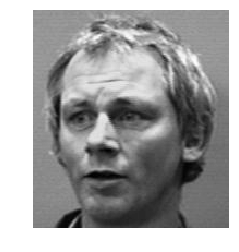

In [4]:
# Show a face from the faces94 dataset.
show(get_faces()[:,0])


## Facial Recognition Class

In [5]:
class FacialRec(object):
    """Class for storing a database of face images, with methods for
    matching other faces to the database.
    
    Attributes:
        F (matrix): k mn-arrays, each representing a face
        shape (tuple): shape of the matrix F
        mean (1-d array): column-array of mean-face
        Fbar (matrix): k mn-arrays, meanshifted
        U, e, Vh (matrix, vector, matrix): SVD of the meanshifted matrix
    """
    # Problems 2-3
    def __init__(self, path='./faces94'):
        """Initialize all attributes.
        This is the main part of the computation.
        """
        self.F = get_faces(path)
        self.shape = self.F.shape
        self.mean = (np.array([np.sum(self.F[i]) for i in range(self.shape[0])]) / self.shape[1]).reshape((self.shape[0],1))
        self.Fbar = self.F - self.mean
        self.U, self.e, self.Vh = la.svd(self.Fbar, full_matrices=False)

    # Problem 3
    def project(self, A, s):
        """Project a face vector onto the subspace spanned by the first s
        eigenfaces, and represent that projection in terms of those eigenfaces.
        
        Parameters:
            A((mn,) or (mn,l) ndarray): The array to be projected. 
            s(int): the number of eigenfaces.
        Returns: 
            ((s,) ndarray): An array of the projected image of s eigenfaces.
        """
        return self.U[:,:s].T @ A

    # Problem 5
    def find_nearest(self, g, s=38):
        """Find the index j such that the jth column of F is the face that is
        closest to the face image 'g'.
        
        Parameters:
            g ((mn,) ndarray): A flattened face image.
            s (int): the number of eigenfaces to use in the projection.

        Returns:
            (int): the index of the column of F that is the best match to
                   the input face image 'g'.
        """
        ghat = self.project(g - self.mean.flatten(), s)
        Fhat = self.project(self.Fbar, s)
        return np.argmin([la.norm(Fhat[:, i] - ghat) for i in range(Fhat.shape[1])])
        

    # Problem 6
    def match(self, image, s=38, m=200, n=180):
        """Display an image along with its closest match from the dataset. 
        
        Parameters:
            image ((mn,) ndarray): A flattened face image.
            s (int): The number of eigenfaces to use in the projection.
            m (int): The original number of rows in the image.
            n (int): The original number of columns in the image.
        """
        index = self.find_nearest(image, s)

        plt.subplot(1, 2, 1)
        show(image)
        plt.subplot(1, 2, 2)
        show(Faces.F[:, index])

## Problem 2

- In `FacialRec.__init__()`, compute $F$, the mean face $\boldsymbol{\mu}$, and the mean-shifted faces $\bar{F}$.
Store each as an attribute.

- Initialize a `FacialRec` object and display its mean face, plus an original image and its shifted face.

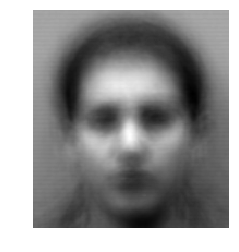

In [6]:
# Display the mean face.
Faces = FacialRec()
show(Faces.mean)

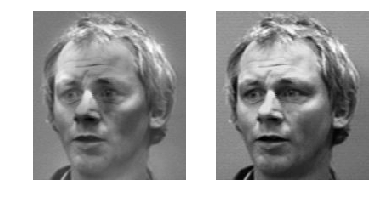

In [7]:
# Display an image along with its mean-shifted face.
plt.subplot(121)
show(Faces.Fbar[:,0])
plt.subplot(122)
show(Faces.F[:,0])


## Problem 3

- In `FacialRec.__init__()`, compute the compact SVD of $\bar{F}$ and store the $U$ as an attribute.
- Use `show()` to display some of the eigenfaces (the columns of $U$).
- Implement `FacialRec.project()` (in a single line).


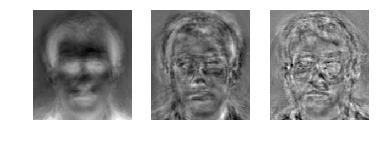

In [8]:
# Display some of the eigenfaces.
plt.subplot(131)
show(Faces.U[:,0])
plt.subplot(132)
show(Faces.U[:,49])
plt.subplot(133)
show(Faces.U[:, 99])

## Problem 4

- Select one of the shifted images $\bar{\mathbf{f}}_i$.
- For at least 4 values of $s$, use `FacialRec.project()` to compute the corresponding $s$-projection $\widehat{\mathbf{f}}_i$, then compute the reconstruction $\widetilde{\mathbf{f}}_i$.
- Display each of the reconstructions and the original image.

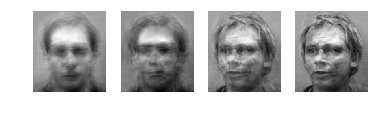

In [9]:
# Display a face image reconstructed with various numbers of eigenfaces. 
plt.subplot(141)
show((Faces.U[:,:5] @ Faces.project(Faces.F[:,0], 5)) + Faces.mean.flatten())
plt.subplot(142)
show((Faces.U[:,:19] @ Faces.project(Faces.F[:,0], 19)) + Faces.mean.flatten())
plt.subplot(143)
show((Faces.U[:,:75] @ Faces.project(Faces.F[:,0], 75)) + Faces.mean.flatten())
plt.subplot(144)
show((Faces.U[:,:120] @ Faces.project(Faces.F[:,0], 120)) + Faces.mean.flatten())

## Problem 5 
Implement `FacialRec.find_nearest()`.

## Problem 6

- Implement `FacialRec.match_face()`.
- Generate some random faces with `sample_faces()`, and use `FacialRec.match_faces()` to find the closest match (let $s=38$).
- For each test, display the sample image and its closest match.

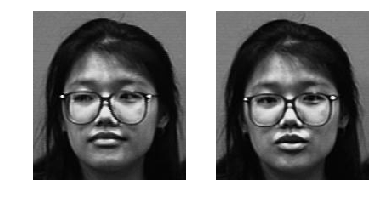

In [10]:
# Display some random images along with their closest match.
Faces = FacialRec()
images = []
for test_image in sample_faces(6):
    images.append(test_image)
Faces.match(images[0])

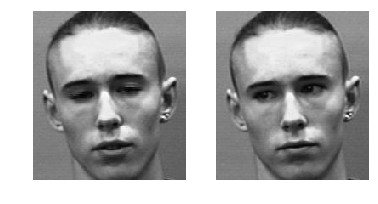

In [11]:
Faces.match(images[1])

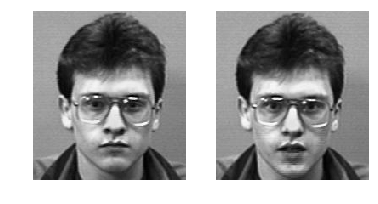

In [12]:
Faces.match(images[2])

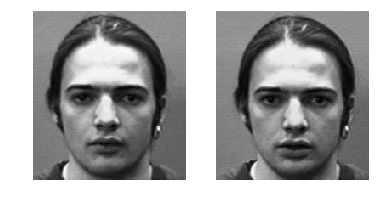

In [13]:
Faces.match(images[3])

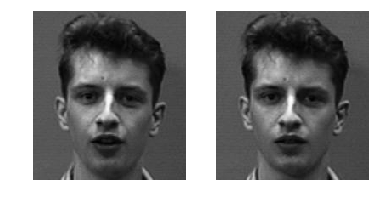

In [14]:
Faces.match(images[4])

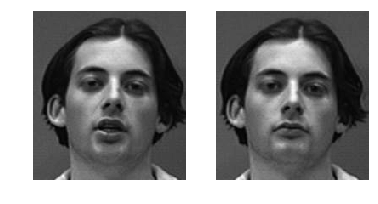

In [15]:
Faces.match(images[5])